# Kübra Zeynep Zor Case Study

In [125]:
import csv
import pandas as pd
import numpy  as np
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns
from string import ascii_letters
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [126]:
#load data 
df  = pd.read_csv("term-deposit-marketing-2020.csv");
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [128]:
df.describe()
#outlier değer göze çarpmıyor. bazı yüksek değerler var yaş değişkeni için örneğin 95 ancak bu değer yaş için olası bir durum.
# bu sebeple outlier  elemesi yapılmadı.

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [129]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


# EDA

20-40 yaş aralığında vadeli mevduat alma oranı yüksek görünüyor. 60 yaş üzerinde de dikkate değer bir potansiyel var.
"age" açıklayıcı bir değişken olabilir.

Text(0.5, 1.0, 'age vs term deposit subscribe')

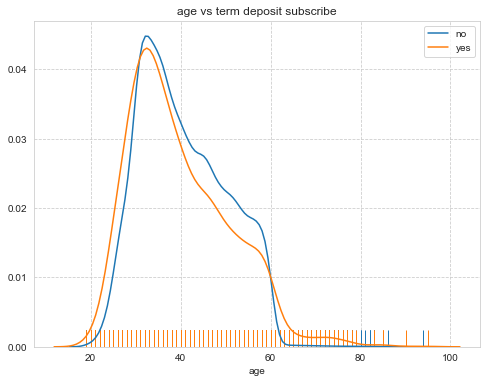

In [130]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax=plt.subplots(figsize=(8,6))
df_no=df[df.y=='no']
df_yes=df[df.y=='yes']
sns.distplot(df_no.age, hist=False, rug=True, ax=ax, label='no')
sns.distplot(df_yes.age, hist=False, rug=True, ax=ax, label='yes')
plt.title('age vs term deposit subscribe')

**Ay başı ve ay sonu günleri müşterilerin mevduat alma oranı daha yüksek. Maaş günleri ile ilintili olabilir. 
"day" değişkeni de güçlü bir predictor olabilir.
 

Text(0.5, 1.0, 'day vs term deposit subscribe')

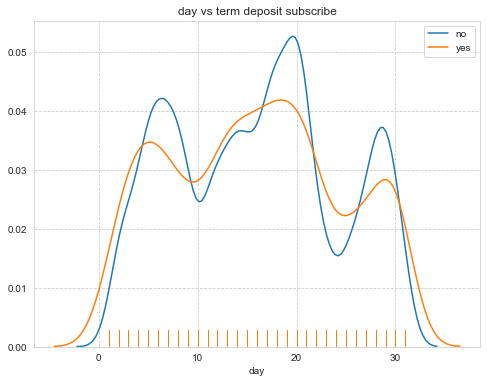

In [131]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax=plt.subplots(figsize=(8,6))
df_no=df[df.y=='no']
df_yes=df[df.y=='yes']
sns.distplot(df_no.day, hist=False, rug=True, ax=ax, label='no')
sns.distplot(df_yes.day, hist=False, rug=True, ax=ax, label='yes')
plt.title('day vs term deposit subscribe')



**Kampanya için yapılan iletişim adedi arttıkça mevduat alma oranı azalıyor."campaign" değişkeni açıklayıcı bir predictor olabilir.

Text(0.5, 1.0, 'campaign vs term deposit subscribe')

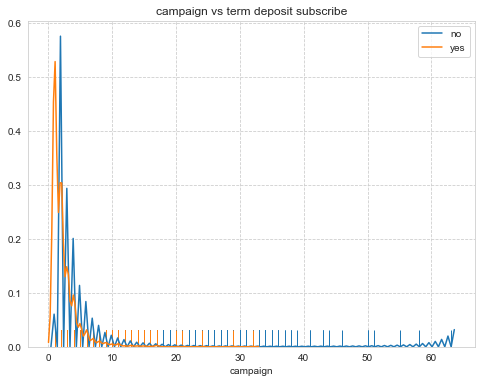

In [132]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax=plt.subplots(figsize=(8,6))
df_no=df[df.y=='no']
df_yes=df[df.y=='yes']
sns.distplot(df_no.campaign, hist=False, rug=True, ax=ax, label='no')
sns.distplot(df_yes.campaign, hist=False, rug=True, ax=ax, label='yes')
plt.title('campaign vs term deposit subscribe')


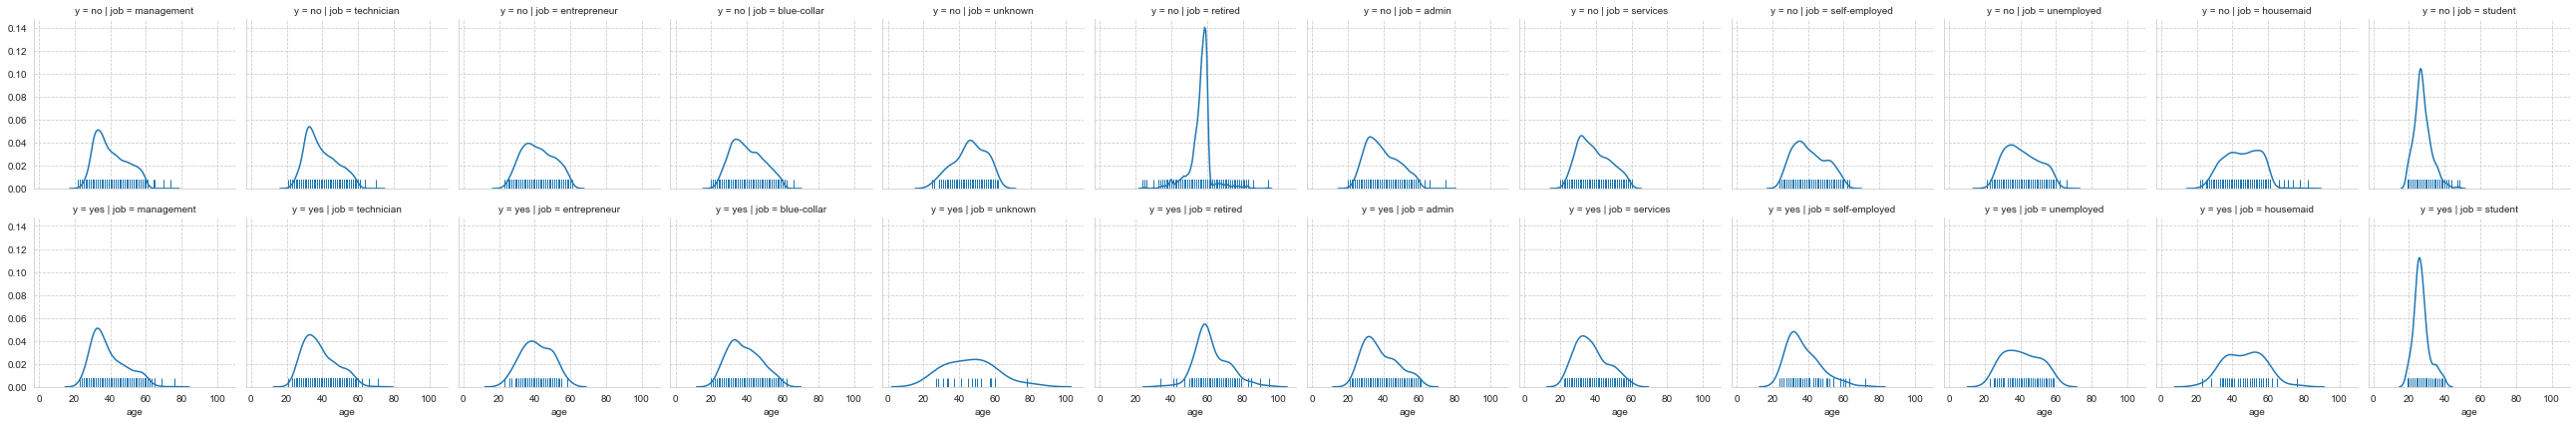

In [133]:
g = sns.FacetGrid(df, col="job", row='y')
g.map(sns.distplot, "age", hist=False, rug=True)


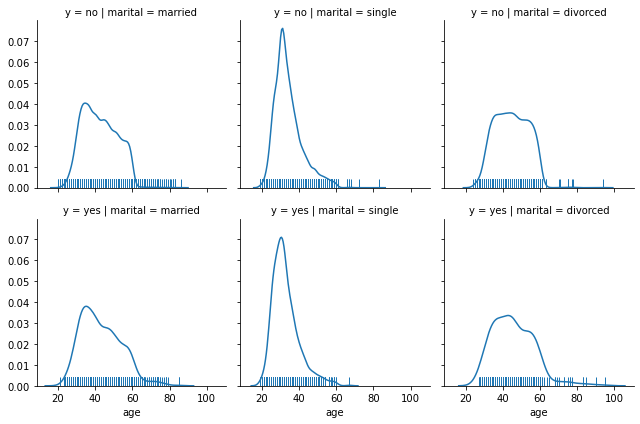

In [23]:
g = sns.FacetGrid(df, col="marital", row='y')
g.map(sns.distplot, "age", hist=False, rug=True)


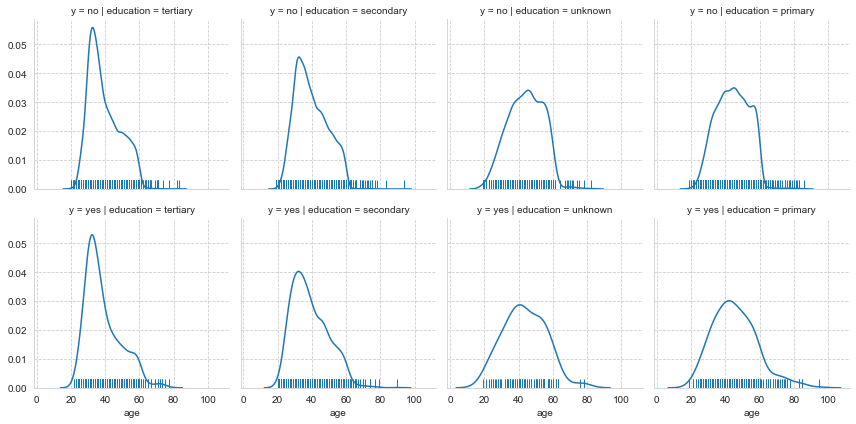

In [134]:
g = sns.FacetGrid(df, col="education", row='y')
g.map(sns.distplot, "age", hist=False, rug=True)

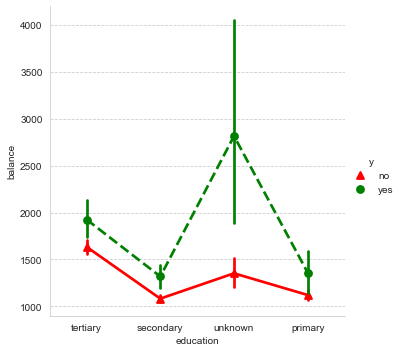

In [137]:
sns.catplot(x="education", y="balance", hue="y",
            palette={'yes': "g", 'no': "r"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df)
#meslek bilgisi bilinmeyen ve yüksek bakiyeye sahip müşterilerin subscribe oranı da yüksek. 

In [138]:
#binary encoding
df['y']=df.y.replace(to_replace=['no', 'yes'], value=[0, 1])
df['default']=df.default.replace(to_replace=['no', 'yes'], value=[0, 1])
df['loan']=df.loan.replace(to_replace=['no', 'yes'], value=[0, 1])
df['housing']=df.housing.replace(to_replace=['no', 'yes'], value=[0, 1])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [139]:
# one-hot encoding 
pd.get_dummies(df['marital'], prefix='marital')
df.head()
df = pd.concat([df, pd.get_dummies(df['marital'], prefix='marital')], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,0,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,0,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0,0,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0,0,0,1


In [140]:
pd.get_dummies(df['education'], prefix='education')
df.head()
df = pd.concat([df, pd.get_dummies(df['education'], prefix='education')], axis=1)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,261,1,0,0,1,0,0,0,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,151,1,0,0,0,1,0,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,76,1,0,0,1,0,0,1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,92,1,0,0,1,0,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,198,1,0,0,0,1,0,0,0,1


In [141]:
pd.get_dummies(df['contact'], prefix='contact')
df.head()
df = pd.concat([df, pd.get_dummies(df['contact'], prefix='contact')], axis=1)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,1,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,1,0,0,1,0,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,1,0,0,0,0,1,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,1,0,0,0,1,0,0,1


In [142]:
#label encoding
df['job_encoded'] = LabelEncoder().fit_transform(df['job'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,job_encoded
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,1,0,0,0,1,0,0,0,1,4
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,1,0,1,0,0,0,0,1,9
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,1,0,0,1,0,0,0,0,1,2
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,1,0,0,0,0,1,0,0,1,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,1,0,0,0,1,0,0,1,11


In [143]:
df.groupby(['month'])['month'].count()

month
apr     2718
aug     5215
dec       13
feb     2296
jan     1176
jul     6380
jun     4734
mar      258
may    13532
nov     3598
oct       80
Name: month, dtype: int64

In [144]:
d = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12}


In [145]:
df.month = df.month.map(d)
df.month

0        5
1        5
2        5
3        5
4        5
        ..
39995    6
39996    6
39997    6
39998    6
39999    6
Name: month, Length: 40000, dtype: int64

In [146]:
df.dtypes

age                     int64
job                    object
marital                object
education              object
default                 int64
balance                 int64
housing                 int64
loan                    int64
contact                object
day                     int64
month                   int64
duration                int64
campaign                int64
y                       int64
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
education_unknown       uint8
contact_cellular        uint8
contact_telephone       uint8
contact_unknown         uint8
job_encoded             int32
dtype: object

In [147]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,job_encoded
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,1,0,0,0,1,0,0,0,1,4
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,1,0,1,0,0,0,0,1,9
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,1,0,0,1,0,0,0,0,1,2
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,1,0,0,0,0,1,0,0,1,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,1,0,0,0,1,0,0,1,11


In [148]:
df_final=df[['age', 'job_encoded', 'marital_divorced','marital_married','marital_single','contact_cellular','contact_telephone','contact_unknown','education_primary','education_secondary','education_tertiary','education_unknown','default','balance','housing','loan','day','month','duration','campaign','y']].copy()

In [100]:
df_final.head()

,age,job_encoded,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,education_primary,education_secondary,...,education_unknown,default,balance,housing,loan,day,month,duration,campaign,y
0,58,4,0,1,0,0,0,1,0,0,...,0,0,2143,1,0,5,5,261,1,0
1,44,9,0,0,1,0,0,1,0,1,...,0,0,29,1,0,5,5,151,1,0
2,33,2,0,1,0,0,0,1,0,1,...,0,0,2,1,1,5,5,76,1,0
3,47,1,0,1,0,0,0,1,0,0,...,1,0,1506,1,0,5,5,92,1,0
4,33,11,0,0,1,0,0,1,0,0,...,1,0,1,0,0,5,5,198,1,0


# Modelling

In [149]:
x = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']
y.shape,x.shape

((40000, 1), (40000, 20))

In [150]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression

In [151]:
kf = KFold(n_splits = 5, shuffle = True)
lr_cv = LogisticRegression()

In [152]:
scores = []
for i in range(5):
    result = next(kf.split(df_final), None)
    x_train = x.iloc[result[0]]
    x_test = x.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = lr_cv.fit(x_train,y_train)
    predictions = lr_cv.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

Scores from each Iteration:  [0.93025, 0.931, 0.927, 0.9315, 0.928375]
Average K-Fold Score : 0.929625


# Metrics

Feature: 0, Score: -0.05507
Feature: 1, Score: -0.00801
Feature: 2, Score: 0.01597
Feature: 3, Score: -0.04258
Feature: 4, Score: -0.03852
Feature: 5, Score: 0.03568
Feature: 6, Score: 0.00961
Feature: 7, Score: -0.11042
Feature: 8, Score: -0.01804
Feature: 9, Score: -0.06208
Feature: 10, Score: 0.01699
Feature: 11, Score: -0.00201
Feature: 12, Score: -0.00185
Feature: 13, Score: 0.00003
Feature: 14, Score: -0.13211
Feature: 15, Score: -0.03132
Feature: 16, Score: -0.01097
Feature: 17, Score: -0.23363
Feature: 18, Score: 0.00430
Feature: 19, Score: -0.11227


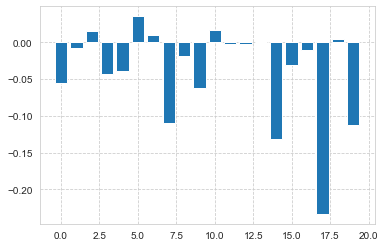

In [153]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [155]:
y_pred = lr_cv.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_cv.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7301   95]
 [ 478  126]]


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7396
           1       0.57      0.21      0.31       604

    accuracy                           0.93      8000
   macro avg       0.75      0.60      0.63      8000
weighted avg       0.91      0.93      0.91      8000



Text(0.5, 257.44, 'Predicted label')

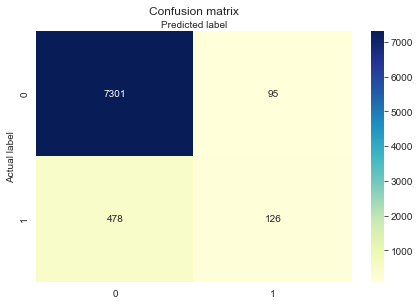

In [158]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [159]:
# Create a list of original variable names from the training DataFrame
original_variables = x_train.columns


In [160]:
coefficient_df = pd.DataFrame({'Variable': original_variables, 
                               'Coefficient': importance})
print(coefficient_df)


               Variable  Coefficient
0                   age    -0.055066
1           job_encoded    -0.008008
2      marital_divorced     0.015969
3       marital_married    -0.042584
4        marital_single    -0.038521
5      contact_cellular     0.035682
6     contact_telephone     0.009606
7       contact_unknown    -0.110424
8     education_primary    -0.018043
9   education_secondary    -0.062078
10   education_tertiary     0.016992
11    education_unknown    -0.002008
12              default    -0.001852
13              balance     0.000032
14              housing    -0.132108
15                 loan    -0.031320
16                  day    -0.010970
17                month    -0.233627
18             duration     0.004297
19             campaign    -0.112274


In [161]:
top_7_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:7]
print(top_7_df)

              Variable  Coefficient
5     contact_cellular     0.035682
10  education_tertiary     0.016992
2     marital_divorced     0.015969
6    contact_telephone     0.009606
18            duration     0.004297
13             balance     0.000032
12             default    -0.001852


# Bonus

1 - EDA kısmında bulunan grafiklerden yola çıkarak 20-40 yaş aralığında ve 60 yaş üstü müşterilerin kampanya eğilimi daha yüksek görünüyor. Kampanya için yapılan iletişim adedi arttıkça 'evet'oranı düşmekte bu sebeple daha önceden iletişim yapılmayan müşterilere gitmek daha doğru olabilir. 

2- Feature coefficents yukarıda gösterilmiştir. 